In [5]:
from tensorflow import keras
from sklearn.preprocessing import StandardScaler

import plotly.graph_objects as go

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout, RepeatVector, TimeDistributed

import pandas as pd
import numpy as np

import tensorflow as tf

import matplotlib.pyplot as plt

import altair as alt
from altair import *

In [109]:
data_dir = "../../../data/"

In [110]:

def p2f(x):
    return float(x.strip('%'))/100

In [143]:
sensor1 = pd.read_csv("{}Campus Energy Centre_1.csv".format(data_dir))
sensor1.columns = ["Timestamp", "FiringRate"]

In [144]:
sensor1.head()

,Timestamp,FiringRate
0,2021-03-31T23:58:45-07:00 Los_Angeles,35%
1,2021-04-01T00:00:00-07:00 Los_Angeles,35%
2,2021-04-01T00:01:00-07:00 Los_Angeles,29%
3,2021-04-01T00:06:03-07:00 Los_Angeles,34%
4,2021-04-01T00:07:05-07:00 Los_Angeles,31%


In [145]:
sensor1.dtypes

Timestamp     object
FiringRate    object
dtype: object

In [146]:
sensor1["FiringRate"].unique()

array(['35%', '29%', '34%', '31%', '26%', '23%', '33%', '30%', '32%',
       '36%', '25%', '38%', '39%', '27%', '28%', '37%', '40%', '41%',
       '42%', '43%', '46%', '47%', '45%', '44%', '50%', '48%', '49%',
       '21%', '22%', '51%', '54%', '52%', '55%', '60%', '53%', '59%',
       '62%', '66%', '61%', '67%', '63%', '70%', '65%', '69%', '73%',
       '56%', '57%', '58%', '78%', '87%', '90%', '75%', '68%', '64%',
       '72%', '74%', '71%', '80%', '24%', '76%', '79%', '83%', '84%',
       '82%', '86%', '89%', '93%', '94%', '97%', '100%', '98%', '95%',
       '99%', '91%', '88%', '96%', '92%', '81%', '85%', '77%', '10%',
       '18%', '14%', '11%', '15%', '0%', '20%', nan], dtype=object)

In [147]:
# sensor1["FiringRate"] = sensor1["FiringRate"].fillna(method='ffill')
sensor1 = sensor1.dropna()

In [148]:
sensor1["FiringRate"].unique()

array(['35%', '29%', '34%', '31%', '26%', '23%', '33%', '30%', '32%',
       '36%', '25%', '38%', '39%', '27%', '28%', '37%', '40%', '41%',
       '42%', '43%', '46%', '47%', '45%', '44%', '50%', '48%', '49%',
       '21%', '22%', '51%', '54%', '52%', '55%', '60%', '53%', '59%',
       '62%', '66%', '61%', '67%', '63%', '70%', '65%', '69%', '73%',
       '56%', '57%', '58%', '78%', '87%', '90%', '75%', '68%', '64%',
       '72%', '74%', '71%', '80%', '24%', '76%', '79%', '83%', '84%',
       '82%', '86%', '89%', '93%', '94%', '97%', '100%', '98%', '95%',
       '99%', '91%', '88%', '96%', '92%', '81%', '85%', '77%', '10%',
       '18%', '14%', '11%', '15%', '0%', '20%'], dtype=object)

In [149]:
sensor1["FiringRate"] = sensor1["FiringRate"].apply(p2f)

In [150]:
sensor1.dtypes

Timestamp      object
FiringRate    float64
dtype: object

In [151]:
subset = sensor1.tail(5000)
train = subset.head(4000)
test = subset.tail(1000)

# split = int(len(sensor1)*0.8)
# train = sensor1.head(split)
# test = sensor1.tail(len(sensor1)-split)

In [154]:
train.head(20)

,Timestamp,FiringRate
24380,2021-03-12T17:57:03-08:00 Los_Angeles,0.35
24381,2021-03-12T17:58:25-08:00 Los_Angeles,0.38
24382,2021-03-12T17:59:27-08:00 Los_Angeles,0.35
24383,2021-03-12T18:00:00-08:00 Los_Angeles,0.40
24384,2021-03-12T18:01:00-08:00 Los_Angeles,0.36
24385,2021-03-12T18:02:00-08:00 Los_Angeles,0.33
24386,2021-03-12T18:03:00-08:00 Los_Angeles,0.38
24387,2021-03-12T18:05:06-08:00 Los_Angeles,0.35
24388,2021-03-12T18:06:06-08:00 Los_Angeles,0.38
24389,2021-03-12T18:07:30-08:00 Los_Angeles,0.41


In [120]:
c1 = alt.Chart(sensor1.tail(5000)).mark_line().encode(
    x='Timestamp',
    y='FiringRate'
)

alt.layer(c1).configure_view(
    stroke='transparent'
).configure_axis(
    domainWidth=0.8
).properties(
    width=1000,
    height=500
)

alt.LayerChart(...)

In [121]:
train["FiringRate"].unique()

array([0.35, 0.38, 0.4 , 0.36, 0.33, 0.41, 0.39, 0.42, 0.37, 0.34, 0.32,
       0.3 , 0.29, 0.31, 0.27, 0.25, 0.28, 0.26, 0.24, 0.43, 0.44, 0.  ,
       0.64, 0.77, 0.63, 0.45, 0.58, 0.73, 0.6 , 0.2 , 0.23, 0.72, 0.75,
       0.68, 0.46, 0.5 , 0.47, 0.48, 0.52, 0.56, 0.59, 0.55, 0.51, 0.49,
       0.53, 0.54, 0.65, 0.7 , 0.62, 0.61, 0.69, 0.67, 0.57, 1.  , 0.9 ,
       0.84, 0.78, 0.71, 0.66])

In [122]:
c1 = alt.Chart(train).mark_line().encode(
    x=alt.X('Timestamp', axis=alt.Axis(labels=False)),
    y=alt.Y("FiringRate", scale=Scale(domain=[0, 1]))
).properties(
    width=800,
    height=500
)

c2 = alt.Chart(test).mark_line().encode(
    x=alt.X('Timestamp', axis=alt.Axis(labels=False)),
    y=alt.Y("FiringRate", scale=Scale(domain=[0, 1]))
).properties(
    width=200,
    height=500
)

# c1 | c2

In [123]:
print(train.shape, test.shape)

(4000, 2) (1000, 2)


In [124]:
scaler = StandardScaler()
scaler = scaler.fit(train[['FiringRate']])

train['FiringRate'] = scaler.transform(train[['FiringRate']])
test['FiringRate'] = scaler.transform(test[['FiringRate']])

<ipython-input-124-9e6dd5a68732>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['FiringRate'] = scaler.transform(train[['FiringRate']])
<ipython-input-124-9e6dd5a68732>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['FiringRate'] = scaler.transform(test[['FiringRate']])


In [125]:
TIME_STEPS=15

def create_sequences(X, y, time_steps=TIME_STEPS):
    Xs, ys = [], []
    for i in range(len(X)-time_steps):
        Xs.append(X.iloc[i:(i+time_steps)].values)
        ys.append(y.iloc[i+time_steps])
    
    return np.array(Xs), np.array(ys)

X_train, y_train = create_sequences(train[['FiringRate']], train['FiringRate'])
X_test, y_test = create_sequences(test[['FiringRate']], test['FiringRate'])

print(f'Training shape: {X_train.shape}')
print(f'Testing shape: {X_test.shape}')

Training shape: (3985, 15, 1)
Testing shape: (985, 15, 1)


In [126]:
# Architecture found on https://towardsdatascience.com/time-series-of-price-anomaly-detection-with-lstm-11a12ba4f6d9
model = Sequential()
model.add(LSTM(128, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dropout(rate=0.2))
model.add(RepeatVector(X_train.shape[1]))
model.add(LSTM(128, return_sequences=True))
model.add(Dropout(rate=0.2))
model.add(TimeDistributed(Dense(X_train.shape[2])))
model.compile(optimizer='adam', loss='mae')
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_4 (LSTM)                (None, 128)               66560     
_________________________________________________________________
dropout_4 (Dropout)          (None, 128)               0         
_________________________________________________________________
repeat_vector_2 (RepeatVecto (None, 15, 128)           0         
_________________________________________________________________
lstm_5 (LSTM)                (None, 15, 128)           131584    
_________________________________________________________________
dropout_5 (Dropout)          (None, 15, 128)           0         
_________________________________________________________________
time_distributed_2 (TimeDist (None, 15, 1)             129       
Total params: 198,273
Trainable params: 198,273
Non-trainable params: 0
________________________________________________

In [127]:
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.1,
                    callbacks=[keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, mode='min')], shuffle=False)


Epoch 1/100
113/113 [==============================] - 5s 21ms/step - loss: 0.4580 - val_loss: 0.4247
Epoch 2/100
113/113 [==============================] - 2s 15ms/step - loss: 0.4038 - val_loss: 0.3888
Epoch 3/100
113/113 [==============================] - 2s 15ms/step - loss: 0.3901 - val_loss: 0.3359
Epoch 4/100
113/113 [==============================] - 2s 15ms/step - loss: 0.3957 - val_loss: 0.3317
Epoch 5/100
113/113 [==============================] - 2s 15ms/step - loss: 0.3751 - val_loss: 0.3327
Epoch 6/100
113/113 [==============================] - 2s 16ms/step - loss: 0.4038 - val_loss: 0.3294
Epoch 7/100
113/113 [==============================] - 2s 17ms/step - loss: 0.3629 - val_loss: 0.3308
Epoch 8/100
113/113 [==============================] - 2s 17ms/step - loss: 0.3791 - val_loss: 0.3269
Epoch 9/100
113/113 [==============================] - 2s 16ms/step - loss: 0.3614 - val_loss: 0.3235
Epoch 10/100
113/113 [==============================] - 2s 17ms/step - loss: 0.352

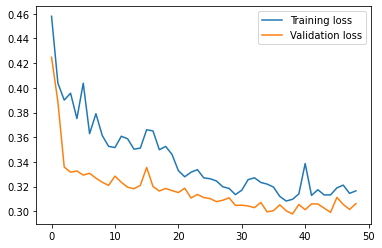

In [128]:
plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.legend();

In [129]:
model.evaluate(X_test, y_test)

31/31 [==============================] - 0s 6ms/step - loss: 0.3195


0.3195429742336273

Reconstruction error threshold: 1.5


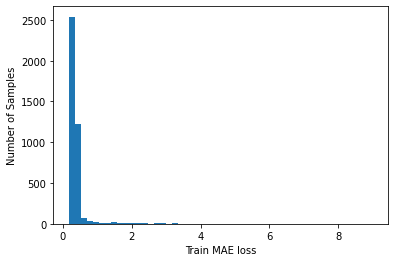

In [130]:
X_train_pred = model.predict(X_train, verbose=0)
train_mae_loss = np.mean(np.abs(X_train_pred - X_train), axis=1)

plt.hist(train_mae_loss, bins=50)
plt.xlabel('Train MAE loss')
plt.ylabel('Number of Samples');

# threshold = np.max(train_mae_loss) / 3.0
threshold = 1.5
print(f'Reconstruction error threshold: {threshold}')

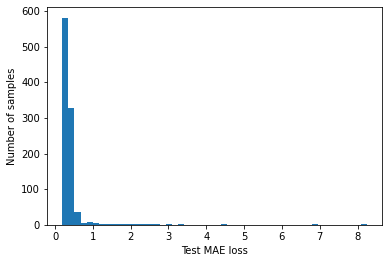

In [131]:

X_test_pred = model.predict(X_test, verbose=0)
test_mae_loss = np.mean(np.abs(X_test_pred-X_test), axis=1)

plt.hist(test_mae_loss, bins=50)
plt.xlabel('Test MAE loss')
plt.ylabel('Number of samples');

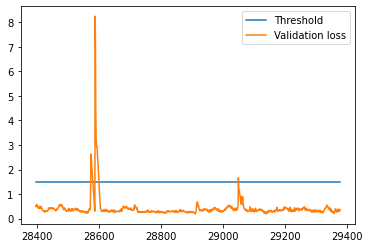

In [132]:
test_score_df = pd.DataFrame(test[TIME_STEPS:])
test_score_df['loss'] = test_mae_loss
test_score_df['threshold'] = threshold
test_score_df['anomaly'] = test_score_df['loss'] > test_score_df['threshold']
test_score_df['FiringRate'] = test[TIME_STEPS:]['FiringRate']


plt.plot(test_score_df['threshold'], label='Threshold')
plt.plot(test_score_df['loss'], label='Validation loss')
plt.legend();

In [133]:
anomalies = test_score_df.loc[test_score_df['anomaly'] == True]
anomalies.shape

(21, 5)

In [134]:
c1 = alt.Chart(test_score_df.tail(1000)).mark_line().encode(
    x='Timestamp',
    y='FiringRate'
)

c2 = alt.Chart(anomalies.tail(1000)).mark_circle().encode(
    x='Timestamp',
    y='FiringRate'
)

In [135]:
alt.layer(c1, c2).configure_view(
    stroke='transparent'
).configure_axis(
    domainWidth=0.8
)

alt.LayerChart(...)

In [136]:
test

,Timestamp,FiringRate
28380,2021-03-17T18:58:54-07:00 Los_Angeles,-0.353840
28381,2021-03-17T18:59:54-07:00 Los_Angeles,-0.715700
28382,2021-03-17T19:00:00-07:00 Los_Angeles,-0.836321
28383,2021-03-17T19:01:00-07:00 Los_Angeles,-0.233219
28384,2021-03-17T19:03:01-07:00 Los_Angeles,-1.560042
...,...,...
29375,2021-03-18T23:50:00-07:00 Los_Angeles,-0.353840
29376,2021-03-18T23:52:09-07:00 Los_Angeles,0.128642
29377,2021-03-18T23:53:09-07:00 Los_Angeles,-0.474460
29378,2021-03-18T23:54:09-07:00 Los_Angeles,-1.318802


AttributeError: 'numpy.ndarray' object has no attribute 'head'

In [138]:
train_score_df = pd.DataFrame(train[TIME_STEPS:])
train_score_df['loss'] = train_mae_loss
train_score_df['threshold'] = threshold
train_score_df['anomaly'] = train_score_df['loss'] > train_score_df['threshold']
train_score_df['FiringRate'] = train[TIME_STEPS:]['FiringRate']

In [139]:
train_score_df.head()

,Timestamp,FiringRate,loss,threshold,anomaly
24395,2021-03-12T18:15:00-08:00 Los_Angeles,0.490502,0.270246,1.5,False
24396,2021-03-12T18:18:48-08:00 Los_Angeles,-0.233219,0.280168,1.5,False
24397,2021-03-12T18:21:11-08:00 Los_Angeles,0.249262,0.402198,1.5,False
24398,2021-03-12T18:22:11-08:00 Los_Angeles,-0.112599,0.292023,1.5,False
24399,2021-03-12T18:23:11-08:00 Los_Angeles,0.249262,0.396784,1.5,False


In [141]:
train.head(17)

,Timestamp,FiringRate
24380,2021-03-12T17:57:03-08:00 Los_Angeles,-0.353840
24381,2021-03-12T17:58:25-08:00 Los_Angeles,0.008021
24382,2021-03-12T17:59:27-08:00 Los_Angeles,-0.353840
24383,2021-03-12T18:00:00-08:00 Los_Angeles,0.249262
24384,2021-03-12T18:01:00-08:00 Los_Angeles,-0.233219
24385,2021-03-12T18:02:00-08:00 Los_Angeles,-0.595080
24386,2021-03-12T18:03:00-08:00 Los_Angeles,0.008021
24387,2021-03-12T18:05:06-08:00 Los_Angeles,-0.353840
24388,2021-03-12T18:06:06-08:00 Los_Angeles,0.008021
24389,2021-03-12T18:07:30-08:00 Los_Angeles,0.369882


In [142]:
subset.head()

,Timestamp,FiringRate
24380,2021-03-12T17:57:03-08:00 Los_Angeles,-0.353840
24381,2021-03-12T17:58:25-08:00 Los_Angeles,0.008021
24382,2021-03-12T17:59:27-08:00 Los_Angeles,-0.353840
24383,2021-03-12T18:00:00-08:00 Los_Angeles,0.249262
24384,2021-03-12T18:01:00-08:00 Los_Angeles,-0.233219
